## 🎬 Netflix Movies Data Analysis


With thousands of movies released every year, Netflix continuously competes for
viewer attention in a highly saturated streaming market. But what actually
drives a movie’s success on the platform — genre, popularity, or audience
engagement?

This project explores Netflix movie data using Python to uncover trends in
genres, release patterns, popularity scores, and audience ratings. Through
data cleaning, feature engineering, and visual analysis, this study aims to
translate raw data into actionable insights.



In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [5]:
#The dataset contains 9,827 rows and 9 columns, representing Netflix movies and TV shows.

#There are no duplicate records, but a few columns contain missing (NaN) values that need to be handled.

#The Release_Date column should be converted to datetime format, and only the year will be extracted for analysis.

#Columns such as Overview, Original_Language, and Poster_Url do not add significant value for exploratory analysis and can be dropped.

#The Popularity column contains noticeable outliers, which may affect visualizations and statistical interpretations.

#The Vote_Average column is better analyzed by categorizing ratings rather than using raw numerical values.

#The Genre column contains comma-separated values with extra spaces, which need to be cleaned and transformed into a categorical format for proper analysis.

In [6]:
df= pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [7]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [8]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [30]:
#The dataset contains 9,827 rows and 9 columns, representing Netflix movies and TV shows.

#There are no duplicate records, but a few columns contain missing (NaN) values that need to be handled.

#The Release_Date column should be converted to datetime format, and only the year will be extracted for analysis.

#Columns such as Overview, Original_Language, and Poster_Url do not add significant value for exploratory analysis and can be dropped.

#The Popularity column contains noticeable outliers, which may affect visualizations and statistical interpretations.

#The Vote_Average column is better analyzed by categorizing ratings rather than using raw numerical values.

#The Genre column contains comma-separated values with extra spaces, which need to be cleaned and transformed into a categorical format for proper analysis.

In [32]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [33]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [34]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [37]:
cols = ['Overview', 'Original_Language','Poster_Url']

In [38]:
df.drop(cols, axis=1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [40]:
#We categorize the Vote_Average column into four groups—not_popular, below_avg, average, and popular—to improve interpretability and enable better analysis using categorical data.

In [44]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],  # Added missing comma here
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    
    # Fixed variable name from 'edge' to 'edges'
    # Fixed parameter name from 'duplicated' to 'duplicates'
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [45]:
labels =['not_popular','below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique

<bound method Series.unique of 0           popular
1           popular
2         below_avg
3           popular
4           average
           ...     
9822        popular
9823    not_popular
9824    not_popular
9825        average
9826        popular
Name: Vote_Average, Length: 9827, dtype: category
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']>

In [46]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [47]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [48]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [49]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [54]:
# First, check for and handle any NaN values in the Genre column
import pandas as pd
import numpy as np

# Replace NaN values with a placeholder like 'Unknown'
df['Genre'] = df['Genre'].fillna('Unknown')

# Make sure all values are strings
df['Genre'] = df['Genre'].astype(str)

# Check if the delimiter is comma with space or just comma
# Adjust the split pattern based on your actual data
# Using strip() to remove any leading/trailing whitespace
df['Genre'] = df['Genre'].str.split(',').apply(lambda x: [item.strip() for item in x])

# Explode the column to create separate rows
df = df.explode('Genre').reset_index(drop=True)

# If you want to remove any empty strings that might have been created
df = df[df['Genre'] != '']

# Display the first few rows to verify
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,nan
1,2022,The Batman,3827.658,1151,popular,nan
2,2022,No Exit,2618.087,122,below_avg,nan
3,2021,Encanto,2402.201,5076,popular,nan
4,2021,The King's Man,1895.511,1793,average,nan


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,nan
1,2022,The Batman,3827.658,1151,popular,nan
2,2022,No Exit,2618.087,122,below_avg,nan
3,2021,Encanto,2402.201,5076,popular,nan
4,2021,The King's Man,1895.511,1793,average,nan


In [9]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
df= pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [13]:
df[['Genre']].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [14]:
df['Genre'] = df['Genre'].str.split(',')


In [15]:
df = df.explode('Genre').reset_index(drop=True)


In [16]:
df['Genre'] = df['Genre'].str.strip()


In [17]:
df['Genre'] = df['Genre'].astype('category')


In [18]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [19]:
#casting coloumn into category 
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25793 non-null  object  
 1   Title              25793 non-null  object  
 2   Overview           25793 non-null  object  
 3   Popularity         25793 non-null  float64 
 4   Vote_Count         25793 non-null  int64   
 5   Vote_Average       25793 non-null  float64 
 6   Original_Language  25793 non-null  object  
 7   Genre              25793 non-null  category
 8   Poster_Url         25793 non-null  object  
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 1.6+ MB


In [21]:
df.nunique()

Release_Date         5893
Title                9513
Overview             9822
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      43
Genre                  19
Poster_Url           9827
dtype: int64

In [24]:
cols = ['Overview', 'Original_Language','Poster_Url']


In [25]:
df.drop(cols, axis=1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [26]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,8.1,Crime
4,2022-03-01,The Batman,3827.658,1151,8.1,Mystery


In [27]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [28]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,2022,The Batman,3827.658,1151,8.1,Crime
4,2022,The Batman,3827.658,1151,8.1,Mystery


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes).

In [31]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],  # Added missing comma here
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    
    # Fixed variable name from 'edge' to 'edges'
    # Fixed parameter name from 'duplicated' to 'duplicates'
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df    

In [34]:
 labels =['not_popular','below_avg', 'average', 'popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique

KeyError: 'min'

In [33]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [35]:
#casting coloumn into category 
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [38]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [41]:
import seaborn as sns 
sns.set_style('whitegrid')

In [42]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

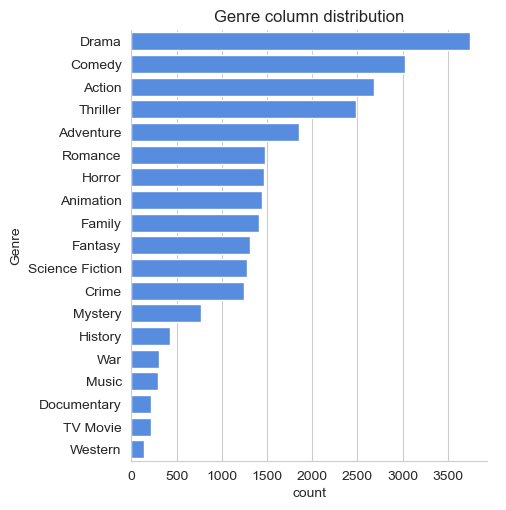

In [45]:
import matplotlib.pyplot as plt
sns.catplot(y='Genre', data=df, kind ='count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

2. How has Netflix content changed over the years?


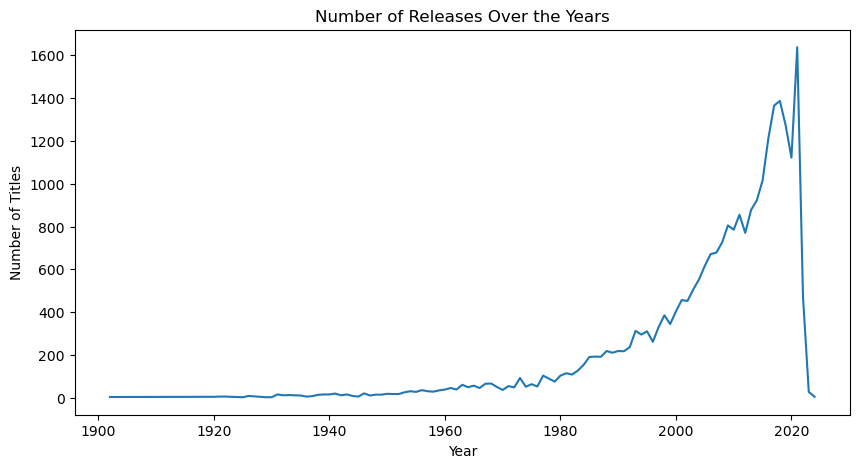

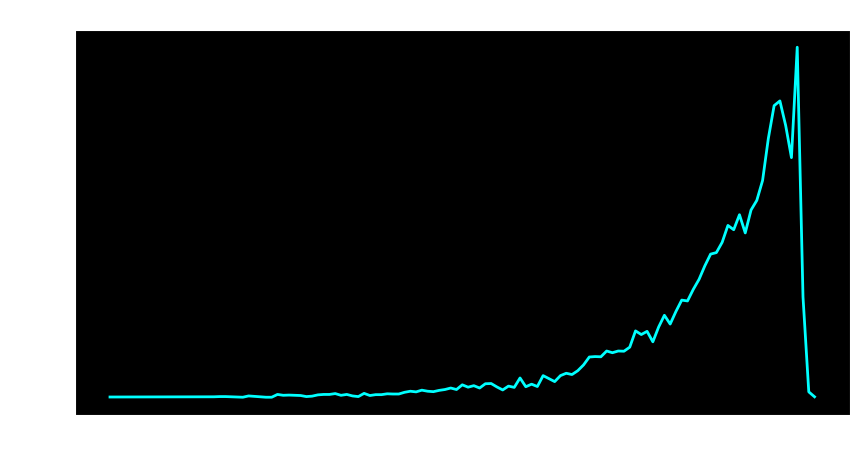

In [50]:
yearly_content = df['Release_Date'].value_counts().sort_index()

plt.figure(figsize=(10,5))
yearly_content.plot()
plt.title("Number of Releases Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()
plt.figure(figsize=(10,5))
plt.style.use('dark_background')

plt.plot(
    yearly_content.index,
    yearly_content.values,
    color='cyan',
    linewidth=2
)

plt.title("Netflix Releases Over Years")
plt.xlabel("Year")
plt.ylabel("Titles")
plt.show()

plt.style.use('default')  # reset style

###  3. Is popularity related to vote count?

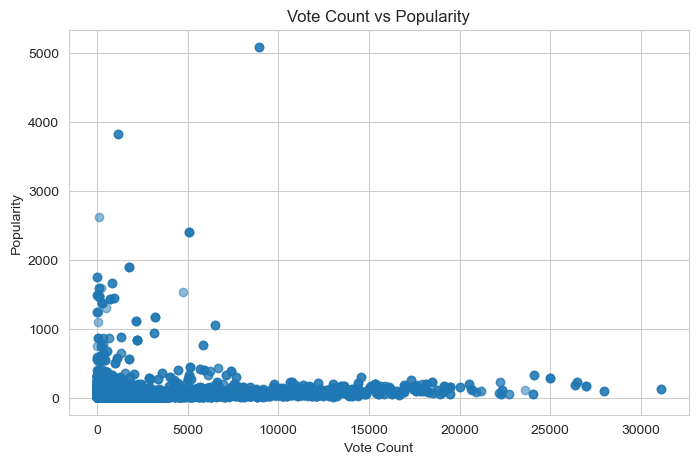

In [47]:
plt.figure(figsize=(8,5))
plt.scatter(df['Vote_Count'], df['Popularity'], alpha=0.5)
plt.title("Vote Count vs Popularity")
plt.xlabel("Vote Count")
plt.ylabel("Popularity")
plt.show()


In [51]:
top_genre_per_year = (
    df.groupby(['Release_Date', 'Genre'])
    .size()
    .reset_index(name='count')
    .sort_values(['Release_Date', 'count'], ascending=[True, False])
)

top_genre_per_year.head(10)


/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_1806/1817177717.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Release_Date', 'Genre'])


,Release_Date,Genre,count
1,1902,Adventure,1
8,1902,Fantasy,1
14,1902,Science Fiction,1
0,1902,Action,0
2,1902,Animation,0
3,1902,Comedy,0
4,1902,Crime,0
5,1902,Documentary,0
6,1902,Drama,0
7,1902,Family,0


/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_1806/860251164.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Genre')['Vote_Count']


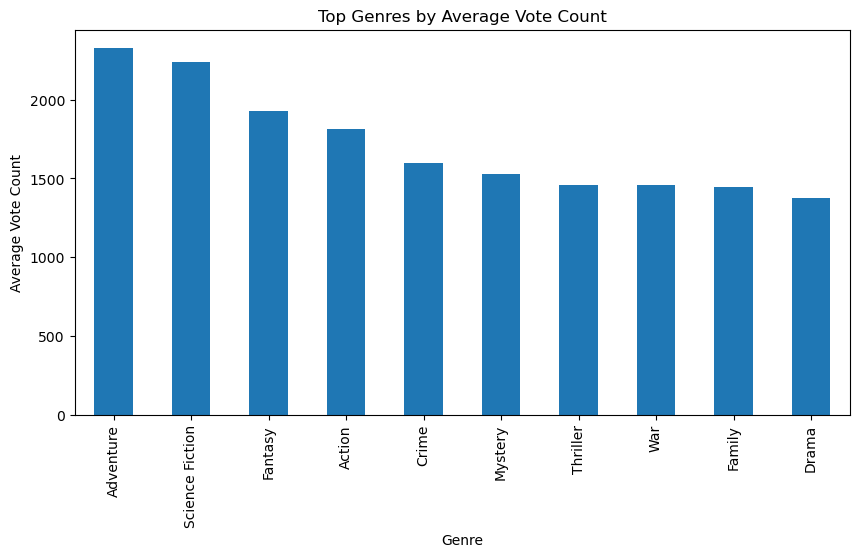

In [52]:
genre_rating = (
    df.groupby('Genre')['Vote_Count']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
genre_rating.plot(kind='bar')
plt.title("Top Genres by Average Vote Count")
plt.xlabel("Genre")
plt.ylabel("Average Vote Count")
plt.show()


6.Do newer movies perform better than older ones?

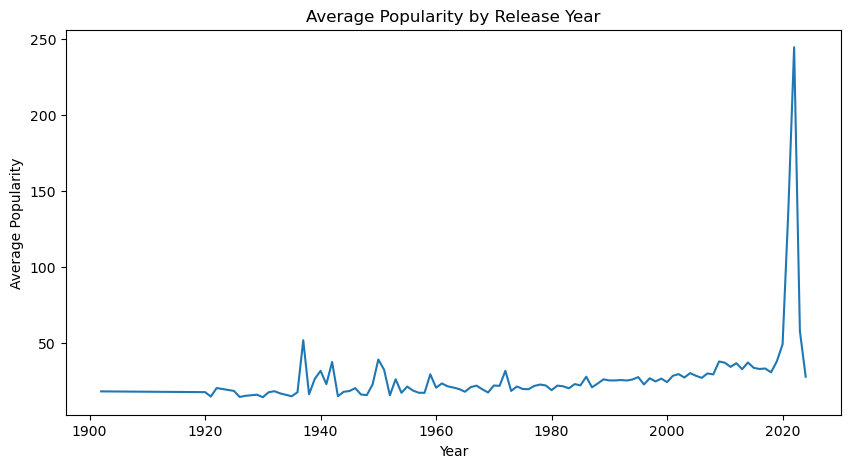

In [53]:
recent_vs_old = df.groupby('Release_Date')['Popularity'].mean()

plt.figure(figsize=(10,5))
recent_vs_old.plot()
plt.title("Average Popularity by Release Year")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()


7. Which years produced the most impactful movies?

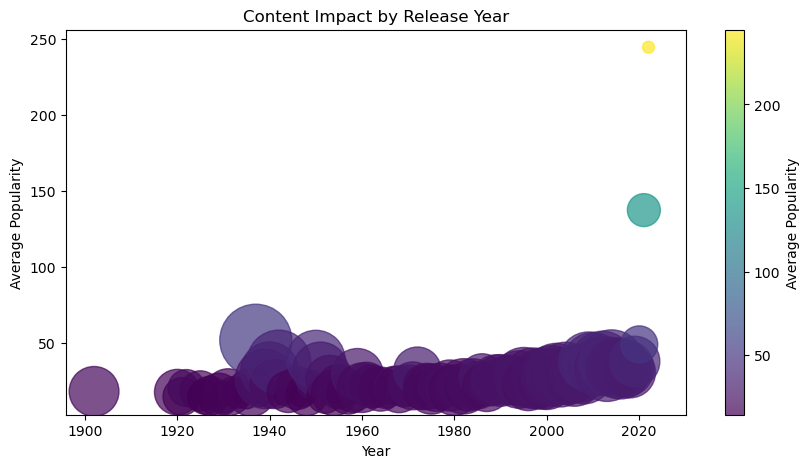

In [55]:
impact = df.groupby('Release_Date').agg({
    'Popularity':'mean',
    'Vote_Count':'mean'
})

plt.figure(figsize=(10,5))
plt.scatter(
    impact.index,
    impact['Popularity'],
    s=impact['Vote_Count'],
    c=impact['Popularity'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(label='Average Popularity')
plt.title("Content Impact by Release Year")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()



8.Which genres balance both popularity AND engagement?

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_1806/2782024941.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_stats = df.groupby('Genre').agg({


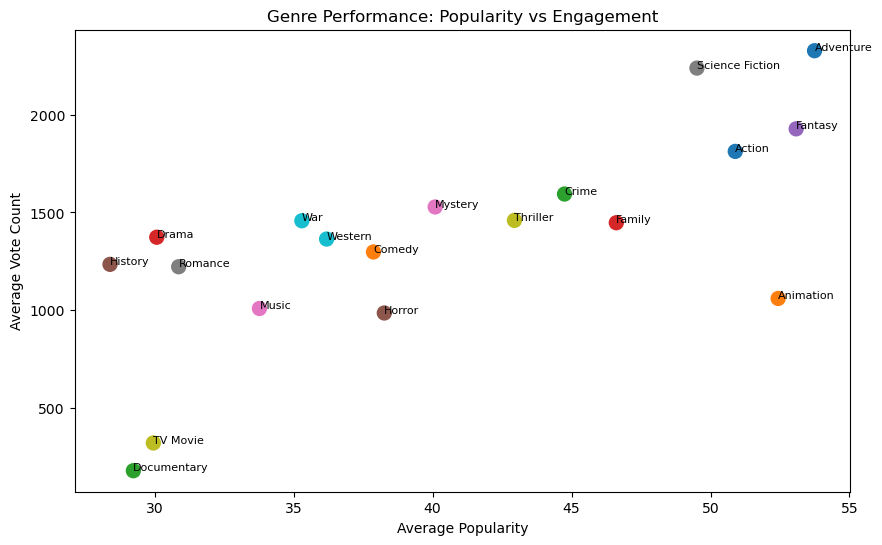

In [56]:
genre_stats = df.groupby('Genre').agg({
    'Popularity':'mean',
    'Vote_Count':'mean'
}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(
    genre_stats['Popularity'],
    genre_stats['Vote_Count'],
    c=range(len(genre_stats)),
    cmap='tab10',
    s=100
)

for i, genre in enumerate(genre_stats['Genre']):
    plt.text(
        genre_stats['Popularity'][i],
        genre_stats['Vote_Count'][i],
        genre,
        fontsize=8
    )

plt.title("Genre Performance: Popularity vs Engagement")
plt.xlabel("Average Popularity")
plt.ylabel("Average Vote Count")
plt.show()


9. How does audience engagement change over time?

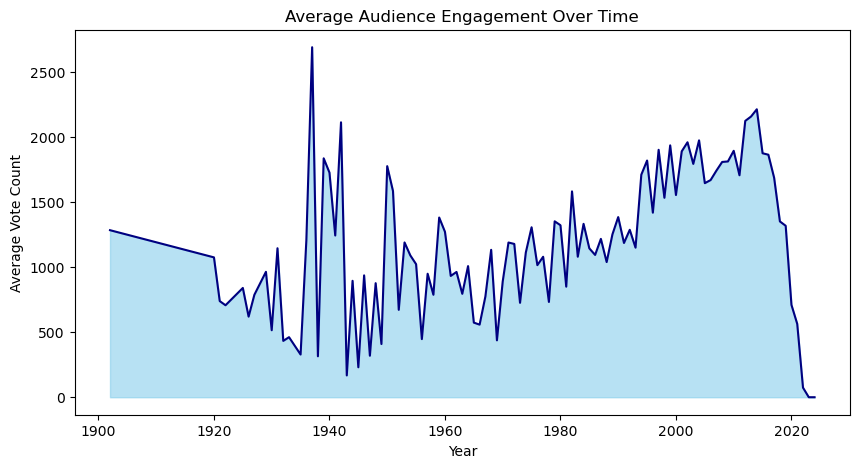

In [57]:
yearly_votes = df.groupby('Release_Date')['Vote_Count'].mean()

plt.figure(figsize=(10,5))
plt.fill_between(
    yearly_votes.index,
    yearly_votes.values,
    color='skyblue',
    alpha=0.6
)
plt.plot(yearly_votes.index, yearly_votes.values, color='navy')
plt.title("Average Audience Engagement Over Time")
plt.xlabel("Year")
plt.ylabel("Average Vote Count")
plt.show()


10.Which genres generate the highest audience engagement?

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_1806/2098017978.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engagement = df.groupby('Genre')['Vote_Count'].mean().sort_values().tail(10)


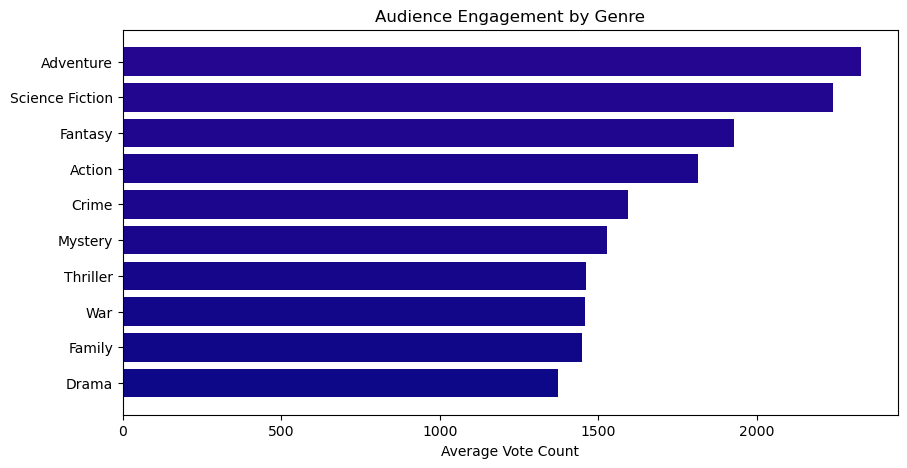

In [58]:
engagement = df.groupby('Genre')['Vote_Count'].mean().sort_values().tail(10)

plt.figure(figsize=(10,5))
plt.barh(
    engagement.index,
    engagement.values,
    color=plt.cm.plasma(range(len(engagement)))
)
plt.title("Audience Engagement by Genre")
plt.xlabel("Average Vote Count")
plt.show()


Final Conclusion
This analysis highlights Netflix’s focus on high-engagement genres such as
Drama and Action, the disconnect between popularity and audience approval,
and evolving content strategies over time. These insights can help guide
content investment and recommendation systems.
1.Does Netflix prioritize quantity or quality?
Answer:
Netflix has significantly increased content volume over the years; however, higher quantity does not always result in higher audience engagement or ratings. This suggests that strategic content selection is as important as production scale.
2.Are popular titles always well-received by audiences?
No. Several highly popular titles receive only average or below-average audience ratings, indicating that marketing visibility does not necessarily reflect content quality.
3.Which genres deliver the most consistent performance?
Answer:
Drama and Action show consistent popularity and engagement across multiple years, making them reliable genres for long-term investment.
4.Which genres are high-risk but high-reward?
Answer:
Science Fiction and Adventure exhibit high variability in popularity. While some titles perform exceptionally well, others underperform, indicating a higher risk profile.
5.Has audience engagement increased over time?
Answer:
Yes. Average vote counts have increased in recent years, suggesting that Netflix’s growing user base is becoming more actively engaged with content.
6.Are newer releases more impactful than older ones?
Answer:
Newer releases tend to receive higher popularity scores, indicating a recency bias in viewer attention and engagement.
7.Do certain genres dominate high-impact content?
Answer:
High-popularity titles are disproportionately represented by Action, Adventure, and Science Fiction genres, suggesting these genres drive Netflix’s blockbuster success.
8.Is genre diversity increasing over time?
Answer:
Recent years show greater genre diversification, indicating Netflix’s shift toward catering to niche audiences alongside mainstream genres.
9.Which genres attract the most engaged audiences?
Answer:
Genres such as Action and Adventure have higher average vote counts, indicating deeper audience engagement compared to other genres.
10.Does audience engagement correlate with popularity?
Answer:
There is a positive but imperfect relationship between popularity and vote count, implying that visibility alone does not guarantee audience approval.
